In [87]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from missingpy import MissForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [89]:
data = pd.read_csv("processed.cleveland.data",header=None)

In [90]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [91]:
data.columns = ["age", #age in years
                    "sex", #(1 = male; 0 = female)
                    "cp", # cp: chest pain type
                            #-- Value 1: typical angina
                            #-- Value 2: atypical angina
                            #-- Value 3: non-anginal pain
                            #-- Value 4: asymptomatic
                    "trestbps", # resting blood pressure (in mm Hg on admission to the hospital)
                    "chol", #serum cholestoral in mg/dl
                    "fbs", #(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
                    "restecg", 
                    #(fasting  restecg: resting electrocardiographic results
                    # -- Value 0: normal
                    #-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                    #-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteriablood sugar > 120 mg/dl) (1 = true; 0 = false)
                    "thalach", # maximum heart rate achieved
                    "exang", # exercise induced angina (1 = yes; 0 = no)
                    "oldpeak",# ST depression induced by exercise relative to rest
                    "slope", # the slope of the peak exercise ST segment
                    #-- Value 1: upsloping
                    #-- Value 2: flat
                    #-- Value 3: downsloping
                    "ca", #  number of major vessels (0-3) colored by flourosopy
                    "thal", # 3 = normal; 6 = fixed defect; 7 = reversable defect
                    "hd"]

In [40]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [92]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [93]:
len(data.loc[(data['ca']=='?') | (data['thal']== "?")])

6

In [94]:
data = data.replace("?", np.nan)

In [105]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
hd          0
dtype: int64

In [119]:
imputer = MissForest()

In [121]:
imputed_data = pd.DataFrame(imputer.fit_transform(data))
imputed_data.columns = data.columns

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [122]:
imputed_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [137]:
X = imputed_data.drop("hd", axis = 1).copy()

In [138]:
y = imputed_data['hd']

In [127]:
X['ca'].unique()

array([0.  , 3.  , 2.  , 1.  , 0.04, 0.44, 0.27])

In [128]:
pd.get_dummies(X, columns=['ca']).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,ca_0.0,ca_0.04,ca_0.27,ca_0.44,ca_1.0,ca_2.0,ca_3.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,6.0,1,0,0,0,0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,0,0,0,0,0,0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,7.0,0,0,0,0,0,1,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,3.0,1,0,0,0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,3.0,1,0,0,0,0,0,0


In [139]:
X_encoded = pd.get_dummies(X, columns=[    'cp',
    'restecg',
    'slope',
    'thal'])

In [140]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_6.52,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,1,0,0,1,0,1,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,0,0,1,0,1,0,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,0,0,1,0,1,0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,1,0,0,0,0,1,1,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,1,1,0,0,1,0,0,0


In [141]:
y_note_zero = y > 0
y[y_note_zero] = 1
y.unique()

array([0., 1.])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [143]:
from sklearn.ensemble import RandomForestClassifier


In [154]:
clf = RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42,
                            oob_score=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                       oob_score=True, random_state=42)

In [155]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(482.8846153846154, 475.65000000000003, 'ca <= 0.635\ngini = 0.498\nsamples = 144\nvalue = [120, 107]\nclass = Does not have HD'),
 Text(257.53846153846155, 339.75, 'thalach <= 159.5\ngini = 0.389\nsamples = 87\nvalue = [103, 37]\nclass = Does not have HD'),
 Text(128.76923076923077, 203.85000000000002, 'thalach <= 117.5\ngini = 0.5\nsamples = 47\nvalue = [36, 35]\nclass = Does not have HD'),
 Text(64.38461538461539, 67.94999999999999, 'gini = 0.219\nsamples = 5\nvalue = [7, 1]\nclass = Does not have HD'),
 Text(193.15384615384616, 67.94999999999999, 'gini = 0.497\nsamples = 42\nvalue = [29, 34]\nclass = Has HD'),
 Text(386.3076923076923, 203.85000000000002, 'slope_1.0 <= 0.5\ngini = 0.056\nsamples = 40\nvalue = [67, 2]\nclass = Does not have HD'),
 Text(321.9230769230769, 67.94999999999999, 'gini = 0.208\nsamples = 11\nvalue = [15, 2]\nclass = Does not have HD'),
 Text(450.69230769230774, 67.94999999999999, 'gini = 0.0\nsamples = 29\nvalue = [52, 0]\nclass = Does not have HD'),
 

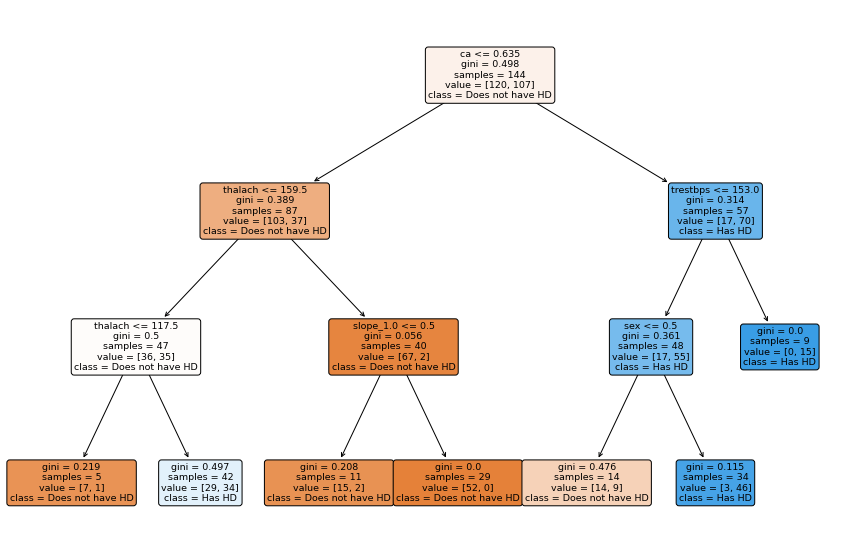

In [156]:
fig = plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[1], 
          feature_names= X_encoded.columns,
          class_names= ['Does not have HD', 'Has HD'], 
          filled=True, impurity=True, 
          rounded=True)

In [162]:
oob_error = 1 - clf.oob_score_

In [163]:
oob_error

0.20264317180616742

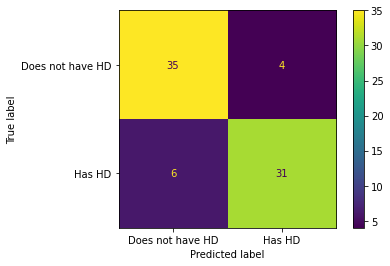

In [164]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["Does not have HD", "Has HD"])